In [1]:
import pandas as pd
import numpy  as np

import pickle
 
from pathlib import Path


import matplotlib.pyplot as plt


import sys
sys.path.append("D:/analyze_Pearson_residuals")

from  nru_DE import *
from  plot_tab_utilities import *


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified
data_folder = r"D:/analyze_Pearson_residuals/"

data_subfolder = "retinal"

data_path = Path ( data_folder + data_subfolder )

In [3]:
 # output plot
plot_jpg =  data_subfolder + "_Figure_1.jpg"

# input data
counts_pkl = "counts_sparse.pkl" # sparse pandas data frame: cells in columns; genes in rows
nru_dict_pkl =  "nru_dict.pkl"



# path: output plot
plot_dsn = data_path / plot_jpg

# paths: input data
counts_dsn = data_path / counts_pkl
nru_dict_dsn = data_path / nru_dict_pkl   

In [4]:
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]		
		

bins_nz = [ 0, 10, 50, 100, 1000, 10000, 1e6]
labels_nz = ['1-10', '11-50', '51-100', '101-1,000', '1,001-10,000','10,001+']

bins_MSSQ_PR = [  0, 1, 2 , 1e6]
labels_MSSQ_PR = [ '<=1', '1<-2', '>2']

In [5]:
#### compute mean SSQ of Pearson residuals for ALL genes with nonzero counts

df_counts_sparse = pd.read_pickle ( counts_dsn )
print ( ' df_counts_sparse:' )
print ( df_counts_sparse )
print ( '\n type( df_counts_sparse ) ', type ( df_counts_sparse ))
print ( '\n df_counts_sparse.sparse.density: ', df_counts_sparse.sparse.density)

 df_counts_sparse:
               r4_TGCCACATGGGC  r4_ATCGGCTACCGA  ...  p1_TAACGCGCTCCT  \
KITL                         0                2  ...                0   
TMTC3                       10                0  ...                0   
CEP290                      24                8  ...                0   
4930430F08RIK                1                1  ...                0   
1700017N19RIK                0                1  ...                0   
...                        ...              ...  ...              ...   
GM23791                      0                0  ...                0   
GM26101                      0                0  ...                0   
4930513O06RIK                0                0  ...                0   
VSIG1                        0                0  ...                0   
GM25207                      0                0  ...                0   

               p1_ATTCTTGTTCTT  
KITL                         0  
TMTC3                        0  
CEP29

In [6]:
#### sparse matrix input to function mean_SSQ_Pearson_residuals
 
counts_scipy_csr_mat = df_counts_sparse.sparse.to_coo().tocsr()
print ( ' counts_scipy_csr_mat:' )
print ( counts_scipy_csr_mat )

 counts_scipy_csr_mat:
  (0, 1)	2
  (0, 3)	17
  (0, 4)	3
  (0, 17)	3
  (0, 18)	7
  (0, 29)	6
  (0, 30)	1
  (0, 38)	4
  (0, 39)	3
  (0, 61)	12
  (0, 69)	1
  (0, 74)	3
  (0, 78)	2
  (0, 79)	1
  (0, 88)	1
  (0, 97)	2
  (0, 125)	1
  (0, 127)	10
  (0, 135)	1
  (0, 168)	2
  (0, 308)	1
  (0, 344)	1
  (0, 358)	1
  (0, 362)	2
  (0, 372)	4
  :	:
  (22267, 21896)	1
  (22268, 22861)	1
  (22269, 21546)	1
  (22270, 21654)	1
  (22271, 21563)	2
  (22272, 21622)	1
  (22273, 24489)	1
  (22274, 23126)	1
  (22275, 21546)	1
  (22276, 23657)	1
  (22277, 21573)	1
  (22278, 22139)	1
  (22279, 22098)	1
  (22280, 22402)	1
  (22281, 21615)	1
  (22282, 22140)	1
  (22283, 24302)	1
  (22284, 22714)	1
  (22285, 21796)	1
  (22286, 22007)	1
  (22287, 24338)	1
  (22288, 21635)	1
  (22289, 23708)	1
  (22290, 21743)	1
  (22291, 21573)	1


In [7]:
df_all_nz_genes = df_counts_sparse.sum ( axis=1 ).to_frame ( name='count' )
counts_GT_0 = ( counts_scipy_csr_mat > 0 ).astype( int )  
df_all_nz_genes['nz_cells'] = np.ravel ( counts_GT_0.sum ( axis=1 ) )

gene_list = df_all_nz_genes.index.values.tolist()
df_all_nz_genes['M_g'] = mean_SSQ_Pearson_residuals ( counts_scipy_csr_mat, gene_list, 1000 )

print ( '\n\n df_all_nz_genes'  )
print ( df_all_nz_genes  )

print ( '\n\n df_all_nz_genes.describe' )
print ( df_all_nz_genes.describe ( percentiles=pctl_list ) )



 df_all_nz_genes
               count  nz_cells       M_g
KITL             491       229  1.117336
TMTC3           1242      1034  1.400875
CEP290         20728      9368  2.808995
4930430F08RIK   1493      1222  1.145704
1700017N19RIK     38        23  0.465358
...              ...       ...       ...
GM23791            1         1  1.449242
GM26101            1         1  0.184574
4930513O06RIK      1         1  1.157879
VSIG1              1         1  0.267904
GM25207            1         1  0.121105

[22292 rows x 3 columns]


 df_all_nz_genes.describe
               count      nz_cells           M_g
count   22292.000000  22292.000000  22292.000000
mean     1484.716401    875.131258      1.134993
std      7264.335676   1731.858758      0.959620
min         1.000000      1.000000      0.026369
1%          1.000000      1.000000      0.136088
5%          1.000000      1.000000      0.374399
10%         2.000000      2.000000      0.562018
25%         9.000000      9.000000      0.8

In [8]:
df_all_nz_genes['nonzero cells'] = pd.cut ( df_all_nz_genes['nz_cells'], bins_nz, labels=labels_nz )
df_all_nz_genes['M_g_category'] = pd.cut ( df_all_nz_genes['M_g'], bins_MSSQ_PR, labels=labels_MSSQ_PR )
pt_nz_vs_Mg = pv_table_noprint_margins ( df_all_nz_genes, 'nonzero cells', 'M_g_category' )

print ( '\n\n Table 2 \n relation between # nonzero_cells  and  mean SSQ of Pearson residuals \n' )
print ( pt_nz_vs_Mg )



 Table 2 
 relation between # nonzero_cells  and  mean SSQ of Pearson residuals 

M_g_category    <=1   1<-2   >2  Total
nonzero cells                         
1-10           3725   1712  507   5944
11-50          1693   1077   67   2837
51-100          665    612   25   1302
101-1,000      2090   4368  109   6567
1,001-10,000    453   4908  147   5508
10,001+           0     62   72    134
Total          8626  12739  927  22292


In [9]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_gene_stats = nru_dict['df_gene_stats'] [[ 'nz_cells', 'M_g', 'A_g']]

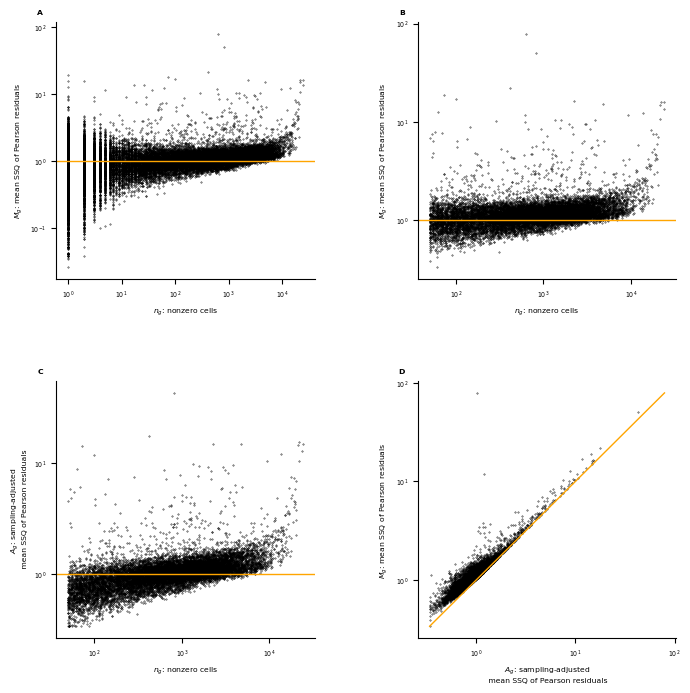

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=( 8, 8) )
  
plot_ax ( df_all_nz_genes, ax1, 'A', 'nz_cells', 'M_g', '$n_g$: nonzero cells',  '$M_g$: mean SSQ of Pearson residuals', line_slope='horizontal'  )  
plot_ax ( df_gene_stats, ax2, 'B', 'nz_cells', 'M_g', '$n_g$: nonzero cells',  '$M_g$: mean SSQ of Pearson residuals', line_slope='horizontal'  )
plot_ax ( df_gene_stats, ax3, 'C', 'nz_cells', 'A_g', '$n_g$: nonzero cells', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', line_slope='horizontal'  )
plot_ax ( df_gene_stats, ax4, 'D', 'A_g', 'M_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', '$M_g$: mean SSQ of Pearson residuals'  )

plt.subplots_adjust( wspace=0.4, hspace=0.4)

plt.savefig( plot_dsn, transparent=True, dpi=300 )